In [93]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats
import scipy.signal

file_path = r'D:\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [94]:
df1 = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape


df3 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()

In [95]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-11') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-11') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-11') & (df3_1hr.index < '2020-04-17')

# Monsoon
date_mask1 = (df1_1hr.index >= '2020-06-17') & (df1_1hr.index < '2020-06-24')
date_mask2 = (df2_1hr.index >= '2020-06-17') & (df2_1hr.index < '2020-06-24')
date_mask3 = (df3_1hr.index >= '2020-06-17') & (df3_1hr.index < '2020-06-24')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-01')
# date_mask2 = (df2_1hr.index >= '2020-09-25') & (df2_1hr.index < '2020-10-01')
# date_mask3 = (df3_1hr.index >= '2020-09-25') & (df3_1hr.index < '2020-10-01')

# # Winter
# date_mask1 = (df1_1hr.index >= '2020-12-24') & (df1_1hr.index < '2020-12-30')
# date_mask2 = (df2_1hr.index >= '2020-12-24') & (df2_1hr.index < '2020-12-30')
# date_mask3 = (df3_1hr.index >= '2020-12-24') & (df3_1hr.index < '2020-12-30')

In [96]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [97]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

In [98]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('############ Sensor - 1 ############')
S1_SM = SM_sensor1
result_S1_SM = adfuller(S1_SM)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-2 Soil Moisture
print('############ Sensor - 5 ############')
S5_SM = SM_sensor5
result_S5_SM = adfuller(S5_SM)
print('ADF Statistics: %f' % result_S5_SM[0])
print('p-value: %f' % result_S5_SM[1])
print('Critical Values:')
for key, value in result_S5_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_SM[0] < result_S5_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-6 Soil Moisture
print('############ Sensor - 6 ############')
# S6_SM = SM_sensor6
# result_S6_SM = adfuller(S6_SM)
# print('ADF Statistics: %f' % result_S6_SM[0])
# print('p-value: %f' % result_S6_SM[1])
# print('Critical Values:')
# for key, value in result_S6_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_SM[0] < result_S6_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
# S7_SM = SM_sensor7
# result_S7_SM = adfuller(S7_SM)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-8 Soil Moisture
print('############ Sensor - 8 ############')
# S8_SM = SM_sensor8
# result_S8_SM = adfuller(S8_SM)
# print('ADF Statistics: %f' % result_S8_SM[0])
# print('p-value: %f' % result_S8_SM[1])
# print('Critical Values:')
# for key, value in result_S8_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_SM[0] < result_S8_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
# S9_SM = SM_sensor9
# result_S9_SM = adfuller(S9_SM)
# print('ADF Statistics: %f' % result_S9_SM[0])
# print('p-value: %f' % result_S9_SM[1])
# print('Critical Values:')
# for key, value in result_S9_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_SM[0] < result_S9_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -3.781148
p-value: 0.003106
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
ADF Statistics: -3.317735
p-value: 0.014104
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Reject Ho - Time Series is Stationary
############ Sensor - 6 ############
############ Sensor - 7 ############
############ Sensor - 8 ############
############ Sensor - 9 ############


In [99]:
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST = ST_sensor1.values
result_S1_ST = adfuller(S1_ST)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Moisture
print('############ Sensor - 5 ############')
S5_ST = ST_sensor5.values
result_S5_ST = adfuller(S5_ST)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-6 Soil Moisture
print('############ Sensor - 6 ############')
# S6_ST = ST_sensor6.values
# result_S6_ST = adfuller(S6_ST)
# print('ADF Statistics: %f' % result_S6_ST[0])
# print('p-value: %f' % result_S6_ST[1])
# print('Critical Values:')
# for key, value in result_S6_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_ST[0] < result_S6_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-7 Soil Moisture
print('############ Sensor - 7 ############')
# S7_ST = ST_sensor7.values
# result_S7_ST = adfuller(S7_ST)
# print('ADF Statistics: %f' % result_S7_ST[0])
# print('p-value: %f' % result_S7_ST[1])
# print('Critical Values:')
# for key, value in result_S7_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_ST[0] < result_S7_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-8 Soil Moisture
print('############ Sensor - 8 ############')
# S8_ST = ST_sensor8.values
# result_S8_ST = adfuller(S8_ST)
# print('ADF Statistics: %f' % result_S8_ST[0])
# print('p-value: %f' % result_S8_ST[1])
# print('Critical Values:')
# for key, value in result_S8_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_ST[0] < result_S8_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
print('############ Sensor - 9 ############')
# S9_ST = ST_sensor9.values
# result_S9_ST = adfuller(S9_ST)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -7.053922
p-value: 0.000000
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
ADF Statistics: -1.681799
p-value: 0.440514
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 6 ############
############ Sensor - 7 ############
############ Sensor - 8 ############
############ Sensor - 9 ############


In [100]:
## Stationarity check after first order differencing

In [101]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')

S1_SM_Diff = np.diff(SM_sensor1)
# plt.plot(S1_SM_Diff)
len(S1_SM_Diff)

# S1_SM = SM_sensor1.values
result_S1_SM = adfuller(S1_SM_Diff)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')

S5_SM_Diff = np.diff(SM_sensor5)
len(S5_SM_Diff)

# S1_SM = SM_sensor1.values
result_S5_SM = adfuller(S5_SM_Diff)
print('ADF Statistics: %f' % result_S5_SM[0])
print('p-value: %f' % result_S5_SM[1])
print('Critical Values:')
for key, value in result_S5_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_SM[0] < result_S5_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 6 ############')

# S6_SM_Diff = np.diff(SM_sensor6)
# len(S6_SM_Diff)

# S1_SM = SM_sensor1.values
# result_S6_SM = adfuller(S6_SM_Diff)
# print('ADF Statistics: %f' % result_S6_SM[0])
# print('p-value: %f' % result_S6_SM[1])
# print('Critical Values:')
# for key, value in result_S6_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_SM[0] < result_S6_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 7 ############')

# S7_SM_Diff = np.diff(SM_sensor7)
# len(S7_SM_Diff)

# # S7_SM = SM_sensor1.values
# result_S7_SM = adfuller(S7_SM_Diff)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

print('############ Sensor - 8 ############')

# S8_SM_Diff = np.diff(SM_sensor8)
# len(S8_SM_Diff)

# S1_SM = SM_sensor8.values
# result_S8_SM = adfuller(S8_SM_Diff)
# print('ADF Statistics: %f' % result_S8_SM[0])
# print('p-value: %f' % result_S8_SM[1])
# print('Critical Values:')
# for key, value in result_S8_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_SM[0] < result_S8_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 9 ############')

# S9_SM_Diff = np.diff(SM_sensor9)
# len(S9_SM_Diff)

# S1_SM = SM_sensor1.values
# result_S9_SM = adfuller(S9_SM_Diff)
# print('ADF Statistics: %f' % result_S9_SM[0])
# print('p-value: %f' % result_S9_SM[1])
# print('Critical Values:')
# for key, value in result_S9_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_SM[0] < result_S9_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    

    
# fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

# ax[0,0].plot(S1_SM_Diff, 'green', label = 'SM after differencing')
# ax[0,0].set(title='S1', ylabel = 'soil moisture')

# ax[0,1].plot(S5_SM_Diff, 'green')
# ax[0,1].set(title='S5', ylabel = 'soil moisture')

# ax[1,0].plot(S6_SM_Diff, 'green')
# ax[1,0].set(title='S6', ylabel = 'soil moisture')

# ax[1,1].plot(S7_SM_Diff, 'green')
# ax[1,1].set(title='S7', ylabel = 'soil moisture')

# # ax[2,0].plot(S8_SM_Diff, 'green')
# # ax[2,0].set(title='S8', ylabel = 'soil moisture')

# # ax[2,1].plot(S9_SM_Diff, 'green')
# # ax[2,1].set(title='S9', ylabel = 'soil moisture')
# fig.legend(loc = 'upper center')
# plt.tight_layout()
# fig.show()

-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -5.426434
p-value: 0.000003
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
ADF Statistics: -5.941345
p-value: 0.000000
Critical Values:
	1%: -3.471
	5%: -2.880
	10%: -2.576
Reject Ho - Time Series is Stationary
############ Sensor - 6 ############
############ Sensor - 7 ############
############ Sensor - 8 ############
############ Sensor - 9 ############


In [102]:
# # Differencing to make the Non-stationary time-series into stationaty

# # def differncing ():
# #     for i in 
# print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')
S1_ST_Diff = np.diff(ST_sensor1)
len(S1_ST_Diff)

result_S1_ST = adfuller(S1_ST_Diff)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')
S5_ST_Diff = np.diff(ST_sensor5)
len(S5_ST_Diff)

result_S5_ST = adfuller(S5_ST_Diff)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 6 ############')
# S6_ST_Diff = np.diff(ST_sensor6)
# len(S6_ST_Diff)

# result_S6_ST = adfuller(S6_ST_Diff)
# print('ADF Statistics: %f' % result_S6_ST[0])
# print('p-value: %f' % result_S6_ST[1])
# print('Critical Values:')
# for key, value in result_S6_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_ST[0] < result_S6_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 7 ############')
# S7_ST_Diff = np.diff(ST_sensor7)
# len(S7_ST_Diff)

# result_S7_ST = adfuller(S7_ST_Diff)
# print('ADF Statistics: %f' % result_S7_ST[0])
# print('p-value: %f' % result_S7_ST[1])
# print('Critical Values:')
# for key, value in result_S7_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_ST[0] < result_S7_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 8 ############')
# S8_ST_Diff = np.diff(ST_sensor8)
# len(S8_ST_Diff)

# result_S8_ST = adfuller(S8_ST_Diff)
# print('ADF Statistics: %f' % result_S8_ST[0])
# print('p-value: %f' % result_S8_ST[1])
# print('Critical Values:')
# for key, value in result_S8_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_ST[0] < result_S8_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 9 ############')
# S9_ST_Diff = np.diff(ST_sensor9)
# len(S9_ST_Diff)

# result_S9_ST = adfuller(S9_ST_Diff)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
###############
# fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

# ax[0,0].plot(S1_ST_Diff, 'green', label = 'ST after differencing')
# ax[0,0].set(title='S1', ylabel = 'soil temp.')

# ax[0,1].plot(S5_ST_Diff, 'green')
# ax[0,1].set(title='S5', ylabel = 'soil temp.')

# # ax[1,0].plot(S6_ST_Diff, 'green')
# # ax[1,0].set(title='S6', ylabel = 'soil temp.')

# ax[1,1].plot(S7_ST_Diff, 'green')
# ax[1,1].set(title='S7', ylabel = 'soil temp.')

# # ax[2,0].plot(S8_ST_Diff, 'green')
# # ax[2,0].set(title='S8', ylabel = 'soil temp.')

# # ax[2,1].plot(S9_ST_Diff, 'green')
# # ax[2,1].set(title='S9', ylabel = 'soil temp.')
# fig.legend(loc = 'upper center')
# plt.tight_layout()
# fig.show()

############ Sensor - 1 ############
ADF Statistics: -7.861569
p-value: 0.000000
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############
ADF Statistics: -8.059239
p-value: 0.000000
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Reject Ho - Time Series is Stationary
############ Sensor - 6 ############
############ Sensor - 7 ############
############ Sensor - 8 ############
############ Sensor - 9 ############


In [103]:
S1_d1 = pd.Series(S1_SM_Diff)
S5_d1 = pd.Series(S5_SM_Diff)
# S6_d1 = pd.Series(S6_SM_Diff)
# S7_d1 = pd.Series(S7_SM_Diff)
# S8_d1 = pd.Series(S8_SM_Diff)
# S9_d1 = pd.Series(S9_SM_Diff)

S1_d2 = pd.Series(S1_ST_Diff)
S5_d2 = pd.Series(S5_ST_Diff)
# S6_d2 = pd.Series(S6_ST_Diff)
# S7_d2 = pd.Series(S7_ST_Diff)
# S8_d2 = pd.Series(S8_ST_Diff)
# S9_d2 = pd.Series(S9_ST_Diff)

S1_correlation = scipy.stats.pearsonr(S1_d1, S1_d2)
S5_correlation = scipy.stats.pearsonr(S5_d1, S5_d2)
# S6_correlation = scipy.stats.pearsonr(S6_d1, S6_d2)
# S7_correlation = scipy.stats.pearsonr(S7_d1, S7_d2)
# S8_correlation = scipy.stats.pearsonr(S8_d1, S8_d2)
# S9_correlation = scipy.stats.pearsonr(S9_d1, S9_d2)

print(S1_correlation)
print(S5_correlation)
# print(S6_correlation)
# print(S7_correlation)
# print(S8_correlation)
# print(S9_correlation)

(-0.18905415669789583, 0.014410070262082773)
(0.9061529231830333, 1.487644551008519e-63)


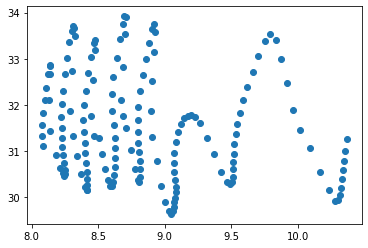

In [104]:
plt.scatter(SM_sensor1, ST_sensor1);

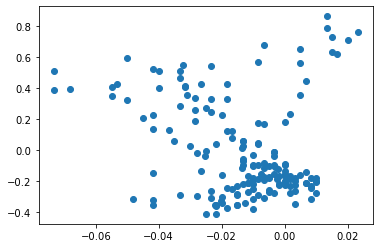

In [105]:
plt.scatter(S1_d1, S1_d2);